<a href="https://colab.research.google.com/github/JAEJOON-LEE/Bridge-iOS/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_%EC%A0%84%EC%B2%B4%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#load necessary libraries

import numpy as np
import pandas as pd
#import tensorflow as tf
#import keras

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기

In [62]:
#load dataset

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- 고객 개개인의 금융정보 + Exited: 이탈여부(1이 이탈한 거)

## EDA

In [63]:
# 요약통계량
df.describe().iloc[:,1:]

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [64]:
display(df.info(), df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

(10000, 14)

- shape: (10000, 14)
- 모든 행에 결측치 없음

In [65]:
# 행번호, 고객ID, 고객이름 칼럼 삭제
df.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

### 시각화

0    7963
1    2037
Name: Exited, dtype: int64


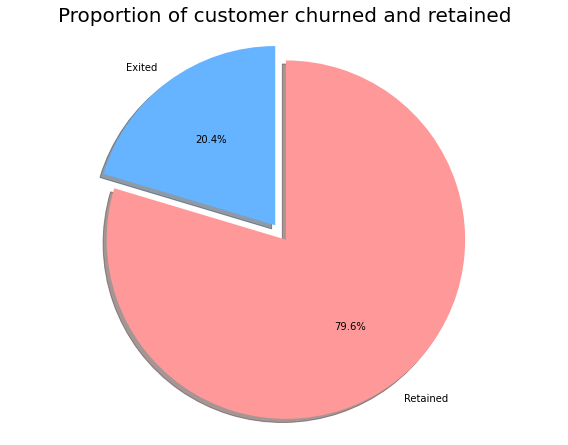

In [66]:
ExitedValues = df.Exited.value_counts()
print(ExitedValues)

labels = 'Exited', 'Retained'
colors = ['#66b3ff', '#ff9999']
sizes = [len(df.loc[df['Exited']==1]), len(df.loc[df['Exited']==0])]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, colors = colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.tight_layout()
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

#### Categorical feature 시각화

- 이탈 고객이 전체의 20%를 차지 -> imbalanced data -> 추후 처리 필요
- 은행입장에서는 보유고객보다는 이탈고객을 정확하게 파악하고 예측하는 게 더 중요

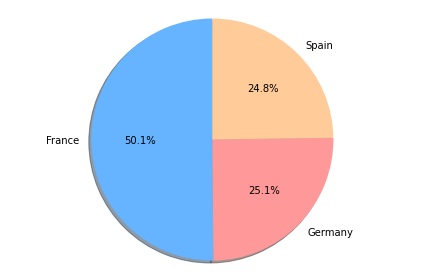

In [67]:
#Geography ratio

Geosplit = df.Geography.value_counts()
Geovalues  = df['Geography'].value_counts().values.tolist()
Geolabels  = df['Geography'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 

f2.axis('equal')
plt.tight_layout()
plt.show()

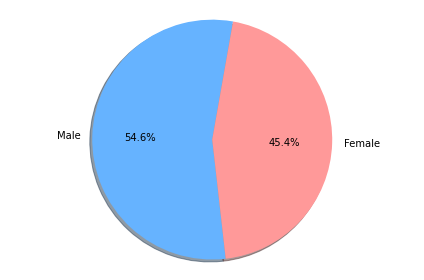

In [68]:
#Gender ratio

Gendervalues  = df['Gender'].value_counts().values.tolist()
GenderLabels = df['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle= 80) 

f3.axis('equal')
plt.tight_layout()
plt.show()

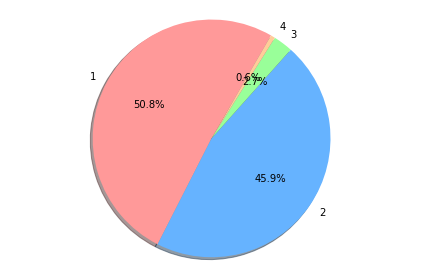

In [69]:
#Number ratio

NumOfProdsvalues  = df['NumOfProducts'].value_counts().values.tolist()
NumOfProdslabels  = df['NumOfProducts'].value_counts().keys().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig4, f4 = plt.subplots()
f4.pie(NumOfProdsvalues ,labels=NumOfProdslabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f4.axis('equal')
plt.tight_layout()
plt.show()

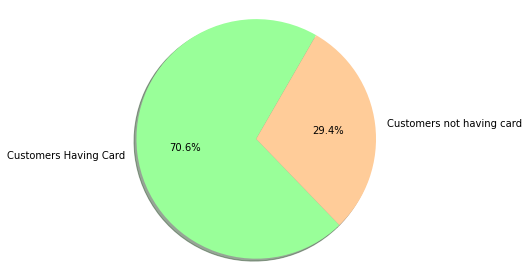

In [70]:
#HasCreditCard ratio

HasCardvalues  = df['HasCrCard'].value_counts().values.tolist()
HasCardlabels  = ["Customers Having Card" , "Customers not having card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f5.axis('equal')
plt.tight_layout()
plt.show()

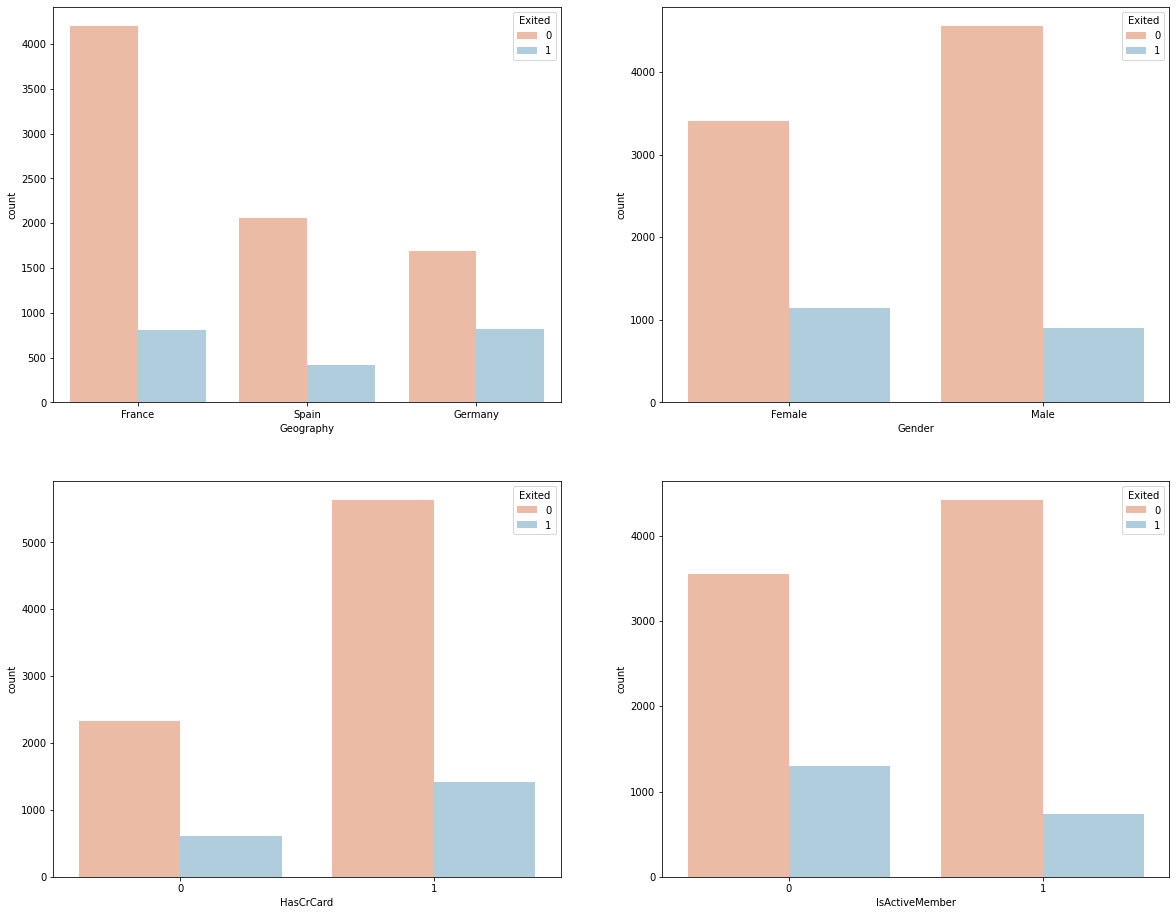

In [71]:
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
plt.subplots_adjust(wspace=0.2)
sns.countplot(x='Geography', palette="RdBu", hue = 'Exited',data = df, ax=ax[0][0])
sns.countplot(x='Gender', palette="RdBu", hue = 'Exited',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', palette="RdBu", hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', palette="RdBu", hue = 'Exited',data = df, ax=ax[1][1])
plt.show()

- Geograpy(국적): 대부분의 국적은 프랑스지만 비율이 적은 독일국적의 고객들의 이탈율이 다른 국가에 비해 높다
- Gender(성별): 여성(Female)이 남성(Male)보다 이탈율이 높다
- HasCrCard(카드소유여부): 이탈고객들은 대부분 신용카드를 가지고 있지만, 거의 모든 고객이 신용카드를 가지고 있기 때문에 큰 정보는 안되는 듯
- IsActiveMember(활동 여부): 활동이 없는 고객의 이탈율이 더 높다

#### numeric feature 시각화

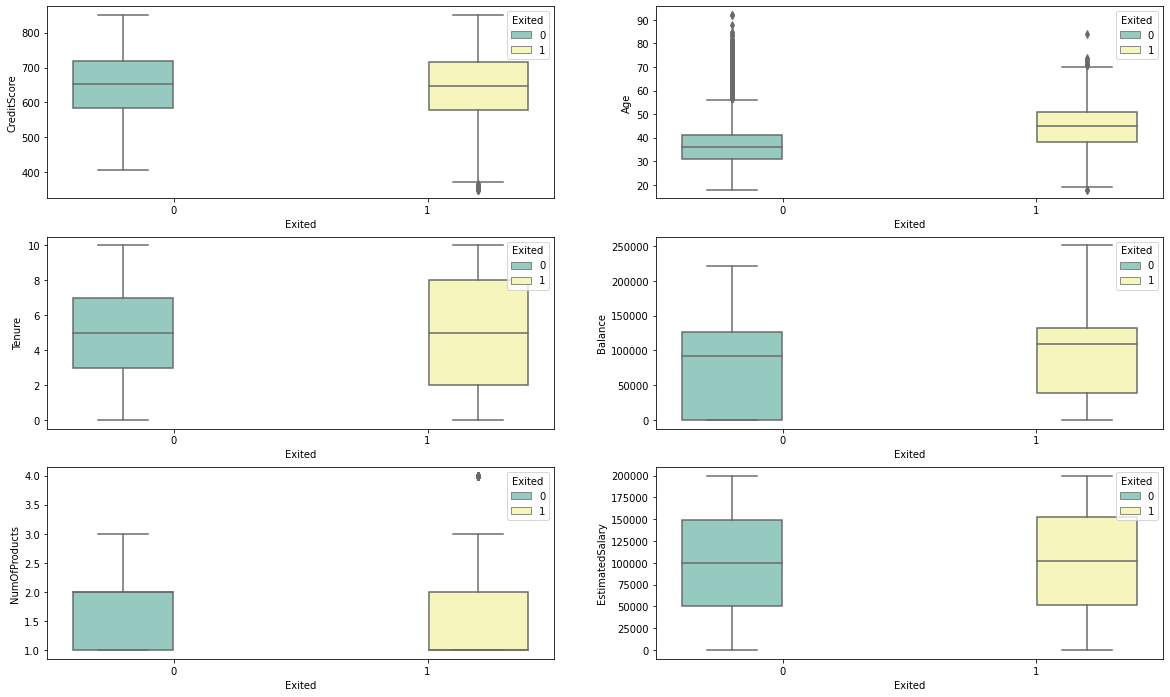

In [72]:
fig, ax = plt.subplots(3, 2, figsize=(20, 12))
plt.subplots_adjust(wspace=0.2)
sns.boxplot(y='CreditScore', palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[0][0])
sns.boxplot(y='Age', palette="Set3", x = 'Exited', hue = 'Exited',data = df , ax=ax[0][1])
sns.boxplot(y='Tenure', palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[1][0])
sns.boxplot(y='Balance', palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[1][1])
sns.boxplot(y='NumOfProducts',palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[2][0])
sns.boxplot(y='EstimatedSalary',palette="Set3", x = 'Exited', hue = 'Exited',data = df, ax=ax[2][1])
plt.show()

- CreditScore: 두 고객 집단 간 신용점수 분포는 큰 차이가 없지만, 이탈 고객에서 신용도가 아주 낮은(이상치) 경우가 많다.
- Age: 대체적으로 연령이 높은 고객들이 이탈율이 높다
- Tenure: 극단의 고객들(은행과 함께한 시간이 아예 적거나 아예 길거나)이 이탈할 가능성이 더 높다.
- Balance(잔고): 비이탈고객들이 더 낮은 분포형태를 가진다
- NumOfProducts: 큰 차이가 없다 -> 이탈에 큰 영향을 미치지 않는다
- EstimatedSalary: 큰 차이가 없다 -> 이탈에 큰 영향을 미치지 않는다

#### 히스토그램

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c9f369790>,
      dtype=object)

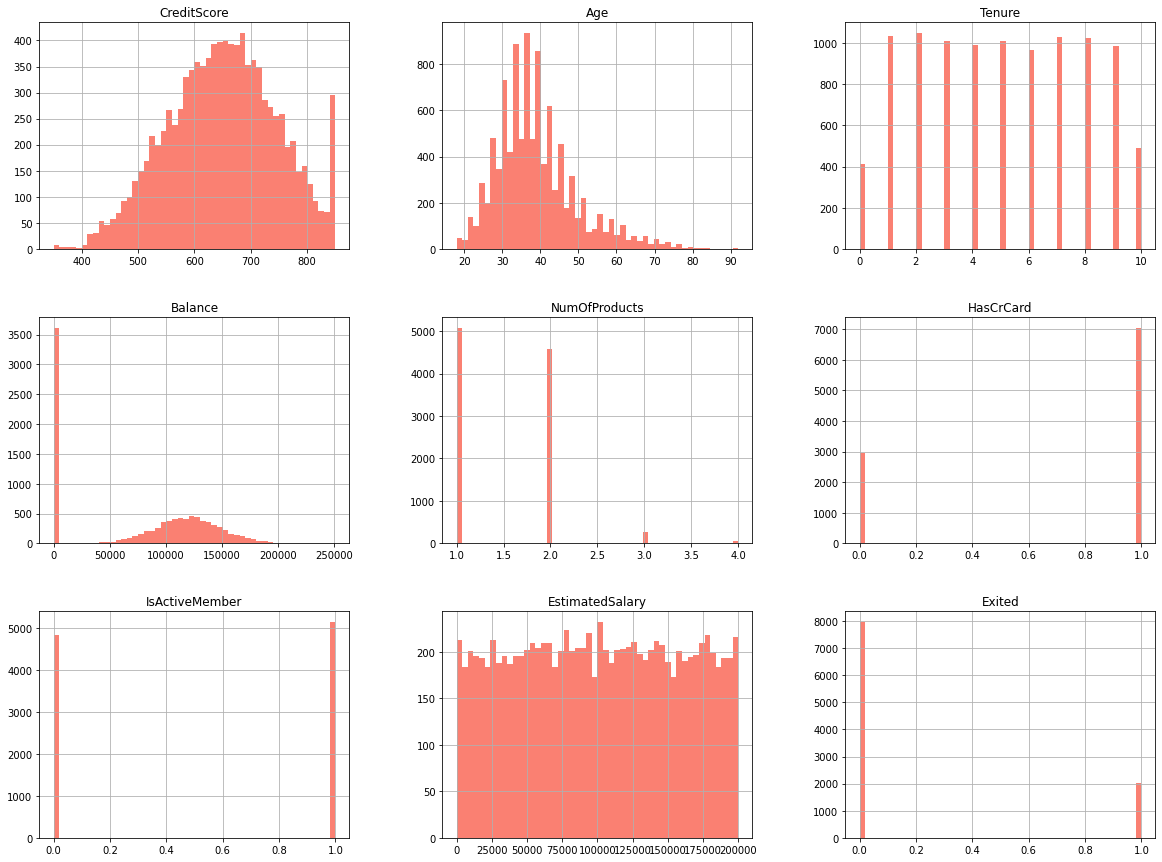

In [73]:
df.hist(bins=50, color="salmon", figsize=(20,15))

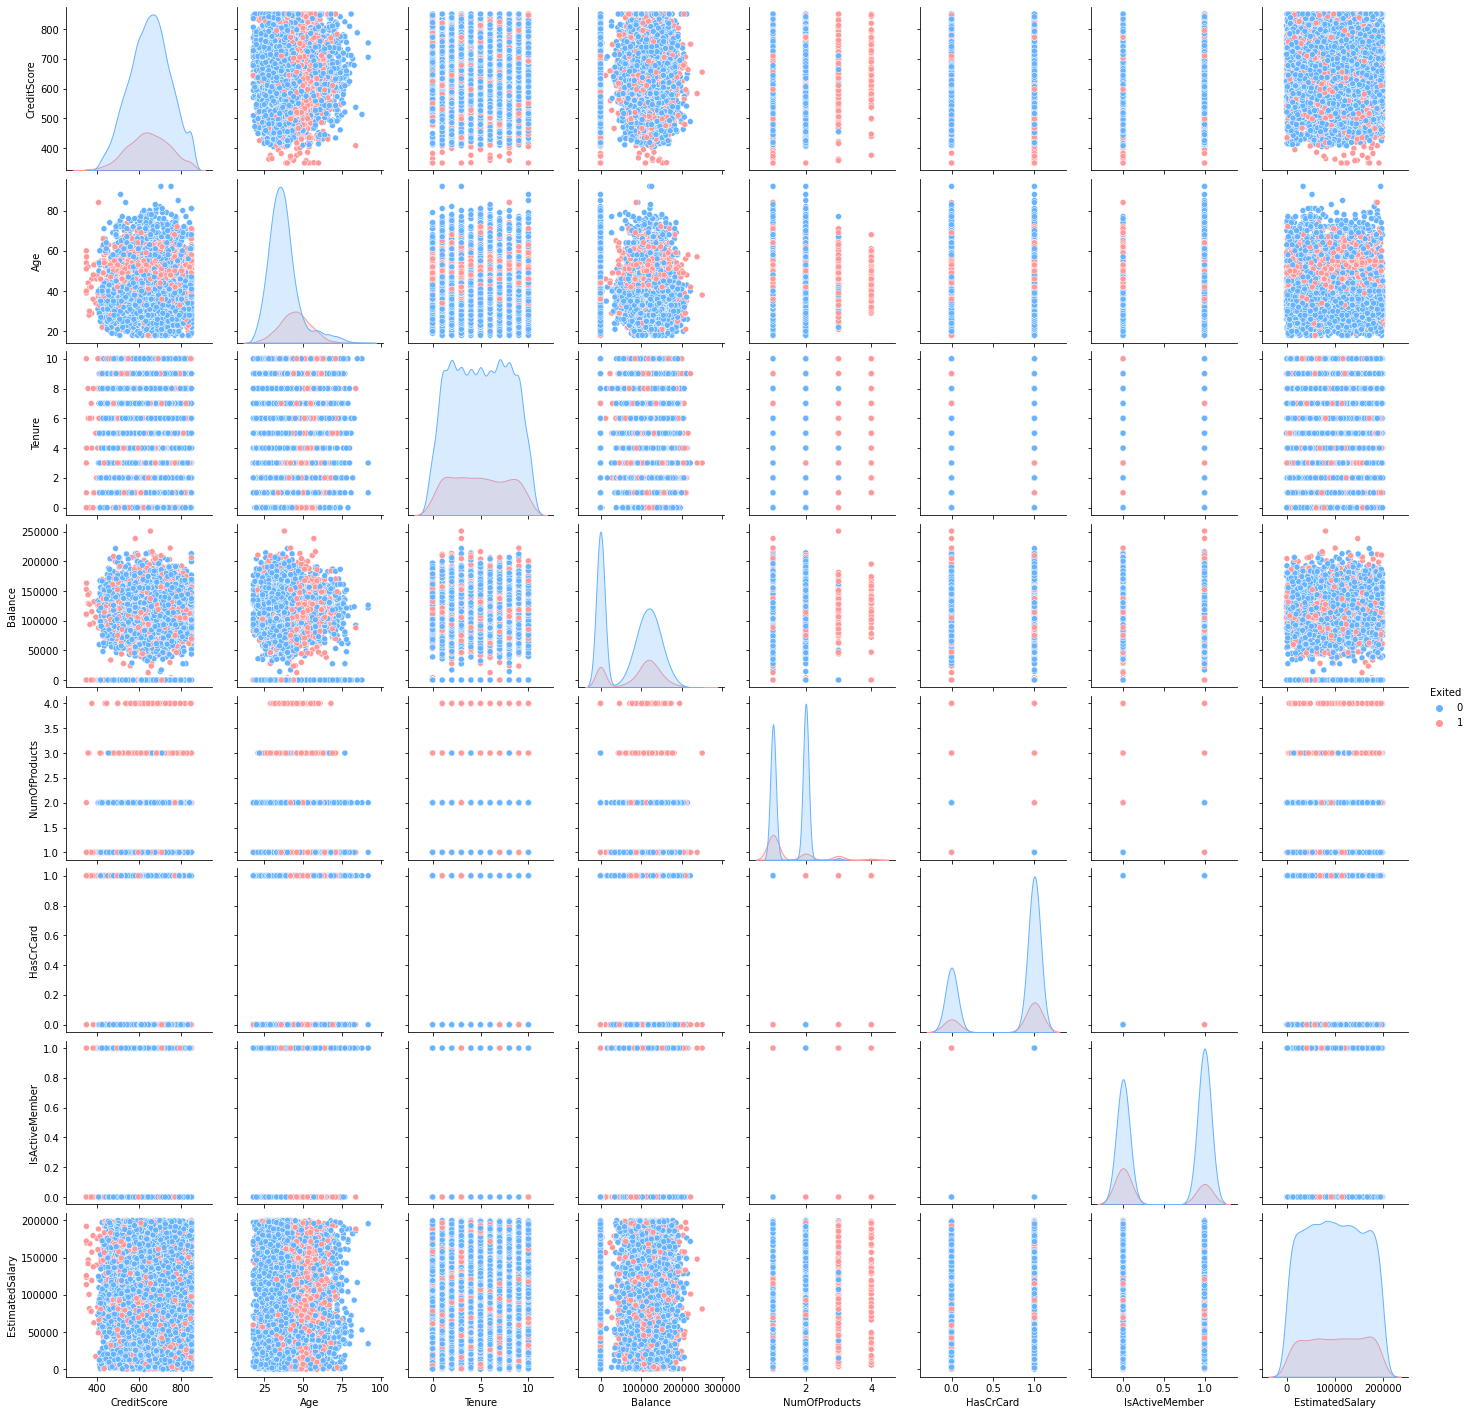

In [74]:
colors = ['#66b3ff', '#ff9999']
sns.pairplot(df, palette = sns.color_palette(colors), hue = 'Exited')

In [75]:
#상관계수

df[df.columns].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


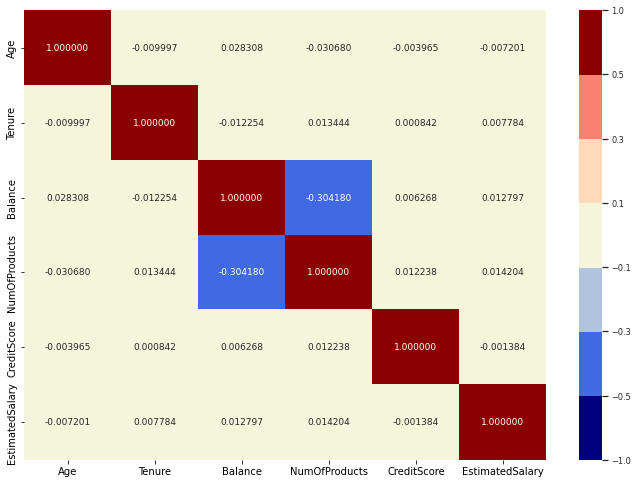

In [76]:
#히트맵
from matplotlib import colors

cmap = colors.ListedColormap(["navy", "royalblue", "lightsteelblue", "beige", "peachpuff", "salmon", "darkred"])
bounds = [-1, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(df[['Age', 'Tenure', 'Balance','NumOfProducts','CreditScore','EstimatedSalary']].corr(), annot = True, fmt = ".6f", cmap=cmap, norm=norm, cbar=True, ax=ax, cbar_kws=dict(ticks=[-1, -0.5, -0.3, -0.1, +0.1, +0.3, +0.5, +1]))
plt.show()

## 데이터 전처리

####  더미변수화

In [77]:
## 원핫인코딩 (0,1 로 표현)
df = pd.get_dummies(df,columns=['Gender','Geography'])

- 지리 변수와 성별 변수를 one-hot 인코딩 형태로 변환

In [78]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

#### 파생변수 생성

In [79]:
## 종속변수와 데이터 값들간의 상관관계
df.corr()['Exited'].sort_values()[::-1]

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
Gender_Female        0.106512
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Geography_France    -0.104955
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

- 이탈여부와 연령 변수간의 양의 상관관계가 비교적 높게 나타나므로 다른 실수형 변수들을 연령변수로 나누어 새로운 피쳐를 생성

In [80]:
df['Tenure/Age'] = df.Tenure / df.Age
df['cre/Age'] = df.CreditScore / df.Age
df['pro/Age'] = df.NumOfProducts / df.Age
df['est/Age'] = df.EstimatedSalary / df.Age
df['bal/est'] = df.Balance / df.EstimatedSalary 
df['bal/age'] = df.Balance / df.Age 

df.corr()['Exited'].sort_values()[::-1]

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
Gender_Female        0.106512
bal/est              0.025558
bal/age              0.017238
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
est/Age             -0.103080
Geography_France    -0.104955
Gender_Male         -0.106512
Tenure/Age          -0.121641
IsActiveMember      -0.156128
pro/Age             -0.193276
cre/Age             -0.253437
Name: Exited, dtype: float64

- est/Age 변수 외의 새로운 파생 변수들은 대체적으로 Exited와 상관관계가 이전보다 높다.

## 스케일링

In [81]:
from sklearn.preprocessing import StandardScaler

- 연속형변수 스케일링 -> StandardScaler

In [82]:
df_s = df.copy() # standard

scale_cols = ['CreditScore','Tenure','NumOfProducts', 'Age','Balance', 'cre/Age', 'est/Age', 'bal/est', 'bal/age','EstimatedSalary']

#### StandardScaler

In [83]:
s_scaler = StandardScaler()
df_s[scale_cols] = s_scaler.fit_transform(df_s[scale_cols])

## 모델링

- 그리드서치를 통해 파라미터 튜닝, 교차검정 cv=5 수행
- 개념 이해용 : https://techblog-history-younghunjo1.tistory.com/100

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,average_precision_score, confusion_matrix, precision_score, recall_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,ExtraTreesClassifier, VotingClassifier,BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE # 데이터 불균형 처리를 위함, 개념 ppt에 넣기

In [85]:
# 모델의 최적의 파라미터 조합과 정확도(accuracy), 혼동행렬과 관련 값들을 확인하기 위한 함수

from sklearn.metrics import precision_score, recall_score, f1_score

def eval_model(model):
    
    roc_auc = roc_auc_score(model.predict(X_test), y_test)
    try:
        score = model.best_score_
        print(model.best_params_)
        print(model.best_estimator_)
        print('accucary : ', score)
        print(confusion_matrix(y_test,  model.predict(X_test)))
        print('precision : ', precision_score(y_test, model.predict(X_test)))
        print('recall : ', recall_score(y_test, model.predict(X_test)))
        print('f1_score : ', f1_score(y_test, model.predict(X_test)))
        print('roc_auc_score : ', roc_auc)
    except :
        score = accuracy_score(model.predict(X_test), y_test)
        print('accucary : ', score)
        print(confusion_matrix(y_test,  model.predict(X_test)))
        print('precision : ', precision_score(y_test, model.predict(X_test)))
        print('recall : ', recall_score(y_test, model.predict(X_test)))
        print('f1_score : ', f1_score(y_test, model.predict(X_test)))
        print('roc_auc_score : ',roc_auc)
    acc.append(score)
    pre.append(precision_score(y_test, model.predict(X_test)))
    rec.append(recall_score(y_test, model.predict(X_test)))
    f1.append(f1_score(y_test, model.predict(X_test)))
    roc.append(roc_auc)
    
acc = []
pre = []
rec = []
f1 = []
roc = []

In [86]:
#ROC curve 그리는 함수

fpr = []
tpr = []
thresholds = []

def plot_roc_curve(fper, tper, model):
    plt.plot(fper, tper, label=model)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    #plt.show()

In [87]:
X = df_s.drop("Exited", axis=1)
y = df_s["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # training 8: test 2

In [88]:
#GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
eval_model(gnb)

prob = gnb.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[0] = fpr_tmp
tpr[0] = tpr_tmp
thresholds[0] = thresholds_tmp

accucary :  0.8045
[[1562   24]
 [ 367   47]]
precision :  0.6619718309859155
recall :  0.11352657004830918
f1_score :  0.19381443298969073
roc_auc_score :  0.7358589066801013


In [89]:
# LogisticRegression

param_grid = {'C': [0.1,1,10,100], 'max_iter': [25,50,75], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}

lr = GridSearchCV(LogisticRegression(random_state = 42),param_grid, cv=5, refit=True, verbose=0)
lr.fit(X_train, y_train)
eval_model(lr)

prob = lr.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[1] = fpr_tmp
tpr[1] = tpr_tmp
thresholds[1] = thresholds_tmp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 75, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=75, random_state=42, tol=1e-05)
accucary :  0.8154999999999999
[[1538   48]
 [ 316   98]]
precision :  0.6712328767123288
recall :  0.23671497584541062
f1_score :  0.35000000000000003
roc_auc_score :  0.7503952948825937


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [90]:
# SVM -> 얘만 돌아가는데 오래 걸리네요 ㅠ

param_grid = {'C': [1,100], 'gamma': [0.1,0.01],'probability':[True],'kernel': ['poly', 'rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
SVM_grid.fit(X_train,y_train)
eval_model(SVM_grid)

prob = SVM_grid.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[2] = fpr_tmp
tpr[2] = tpr_tmp
thresholds[2] = thresholds_tmp

{'C': 100, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, gamma=0.1, kernel='poly', probability=True)
accucary :  0.85825
[[1521   65]
 [ 218  196]]
precision :  0.7509578544061303
recall :  0.47342995169082125
f1_score :  0.5807407407407408
roc_auc_score :  0.8127992262254919


In [91]:
# DecisionTreeClassifier

param = {'criterion' : ['gini','entropy'], 'max_depth' : [4,5,6], 'min_samples_split' : [4,5],
        'min_samples_leaf' : [2,3,4]}

dt = GridSearchCV(DecisionTreeClassifier(), param_grid = param, cv = 5, refit = True, n_jobs = -1)
dt.fit(X_train, y_train)
eval_model(dt)

prob = dt.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[3] = fpr_tmp
tpr[3] = tpr_tmp
thresholds[3] = thresholds_tmp

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5}
DecisionTreeClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=5)
accucary :  0.8598750000000001
[[1531   55]
 [ 233  181]]
precision :  0.7669491525423728
recall :  0.43719806763285024
f1_score :  0.5569230769230769
roc_auc_score :  0.8174314923709597


In [92]:
# RandomForestClassifier

param_grid = {'max_depth': [3,5,8], 'max_features': [4,6,7],
              'n_estimators':[50,100,200],'min_samples_split': [3, 5, 6]}
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0, n_jobs = -1)
rf.fit(X_train, y_train)
eval_model(rf)

prob = rf.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[4] = fpr_tmp
tpr[4] = tpr_tmp
thresholds[4] = thresholds_tmp

{'max_depth': 8, 'max_features': 6, 'min_samples_split': 3, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3)
accucary :  0.865
[[1532   54]
 [ 223  191]]
precision :  0.7795918367346939
recall :  0.4613526570048309
f1_score :  0.5796661608497724
roc_auc_score :  0.8262631548345833


In [93]:
# KNeighborsClassifier

param = {'n_neighbors' : [4,5,6]}
knn = GridSearchCV(KNeighborsClassifier(), cv = 5, param_grid = param, verbose = 0, refit = True, n_jobs = -1)
knn.fit(X_train,y_train)
eval_model(knn)

prob = knn.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[5] = fpr_tmp
tpr[5] = tpr_tmp
thresholds[5] = thresholds_tmp

{'n_neighbors': 6}
KNeighborsClassifier(n_neighbors=6)
accucary :  0.8362499999999999
[[1529   57]
 [ 263  151]]
precision :  0.7259615384615384
recall :  0.3647342995169082
f1_score :  0.48553054662379425
roc_auc_score :  0.7895990728021978


In [94]:
# GradientBoostingClassifier

param = {"loss" : ["deviance"], "learning_rate" : [0.01, 0.025, 0.1],
    "max_depth":[4,5], "n_estimators" : [100, 150], "subsample" : [0.9]}
gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), cv = 5, param_grid = param, refit = True, verbose = 0, n_jobs = -1)
gbc.fit(X_train,y_train)
eval_model(gbc)

prob = knn.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[6] = fpr_tmp
tpr[6] = tpr_tmp
thresholds[6] = thresholds_tmp

{'learning_rate': 0.025, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}
GradientBoostingClassifier(learning_rate=0.025, max_depth=5, n_estimators=150,
                           random_state=42, subsample=0.9)
accucary :  0.867125
[[1530   56]
 [ 217  197]]
precision :  0.7786561264822134
recall :  0.4758454106280193
f1_score :  0.5907046476761619
roc_auc_score :  0.827221595009853


In [95]:
# XGBClassifier

param_grid = {'max_depth': [5,7], 'gamma': [0.01,0.001], 'learning_rate': [0.05,0.1], 'n_estimators':[10,100], 'min_child_weight' : [5]}
xgb  = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0, n_jobs = -1)
xgb.fit(X_train, y_train)
eval_model(xgb)

prob = xgb.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[7] = fpr_tmp
tpr[7] = tpr_tmp
thresholds[7] = thresholds_tmp

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(gamma=0.01, max_depth=5, min_child_weight=5)
accucary :  0.86725
[[1519   67]
 [ 211  203]]
precision :  0.7518518518518519
recall :  0.49033816425120774
f1_score :  0.5935672514619883
roc_auc_score :  0.8149432669663883


In [96]:
# LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
eval_model(lda)

prob = lda.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[8] = fpr_tmp
tpr[8] = tpr_tmp
thresholds[8] = thresholds_tmp

accucary :  0.8075
[[1511   75]
 [ 310  104]]
precision :  0.5810055865921788
recall :  0.25120772946859904
f1_score :  0.35075885328836426
roc_auc_score :  0.7053847262999334


In [97]:
# LGBMClassifier

param = {'n_estimators' : [100,200,300], 'num_iterations' : [100,150],
        'learning_rate' : [0.01, 0.05, 0.1], 'max_depth' : [5,6,7],
        'num_leaves' : [20,30,40], 'gamma' : [0.01, 0.001], 'min_child_weight':[5,10]}
lgbm = GridSearchCV(LGBMClassifier(random_state = 42), cv = 5, refit = True, param_grid = param, verbose = 0, n_jobs = -1)
lgbm.fit(X_train, y_train)
eval_model(lgbm)

prob = lgbm.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[9] = fpr_tmp
tpr[9] = tpr_tmp
thresholds[9] = thresholds_tmp

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'gamma': 0.01, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 100, 'num_iterations': 150, 'num_leaves': 20}
LGBMClassifier(gamma=0.01, learning_rate=0.05, max_depth=6, min_child_weight=5,
               num_iterations=150, num_leaves=20, random_state=42)
accucary :  0.866375
[[1523   63]
 [ 211  203]]
precision :  0.7631578947368421
recall :  0.49033816425120774
f1_score :  0.5970588235294118
roc_auc_score :  0.8207369635160565


#### smote처리 데이터셋 모델링

In [98]:
# smote 처리
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (8000, 19) (8000,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (12754, 19) (12754,)
SMOTE 적용 후 레이블 값 분포: 
 0    6377
1    6377
Name: Exited, dtype: int64


In [99]:
# 모델의 최적의 파라미터 조합과 정확도(accuracy), 혼동행렬과 관련 값들을 확인하기 위한 함수

from sklearn.metrics import precision_score, recall_score, f1_score

def eval_model(model):
    
    roc_auc = roc_auc_score(model.predict(X_test), y_test)
    try:
        score = model.best_score_
        print(model.best_params_)
        print(model.best_estimator_)
        print('accucary : ', score)
        print(confusion_matrix(y_test,  model.predict(X_test)))
        print('precision : ', precision_score(y_test, model.predict(X_test)))
        print('recall : ', recall_score(y_test, model.predict(X_test)))
        print('f1_score : ', f1_score(y_test, model.predict(X_test)))
        print('roc_auc_score : ', roc_auc)
    except :
        score = accuracy_score(model.predict(X_test), y_test)
        print('accucary : ', score)
        print(confusion_matrix(y_test,  model.predict(X_test)))
        print('precision : ', precision_score(y_test, model.predict(X_test)))
        print('recall : ', recall_score(y_test, model.predict(X_test)))
        print('f1_score : ', f1_score(y_test, model.predict(X_test)))
        print('roc_auc_score : ',roc_auc)
    acc.append(score)
    pre.append(precision_score(y_test, model.predict(X_test)))
    rec.append(recall_score(y_test, model.predict(X_test)))
    f1.append(f1_score(y_test, model.predict(X_test)))
    roc.append(roc_auc)
    
acc = []
pre = []
rec = []
f1 = []
roc = []

In [100]:
#GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
eval_model(gnb)

prob = gnb.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[10] = fpr_tmp
tpr[10] = tpr_tmp
thresholds[10] = thresholds_tmp

accucary :  0.8045
[[1562   24]
 [ 367   47]]
precision :  0.6619718309859155
recall :  0.11352657004830918
f1_score :  0.19381443298969073
roc_auc_score :  0.7358589066801013


In [101]:
# LogisticRegression

param_grid = {'C': [0.1,1,10,100], 'max_iter': [25,50,75], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}

lr = GridSearchCV(LogisticRegression(random_state = 42),param_grid, cv=5, refit=True, verbose=0)
lr.fit(X_train_over, y_train_over)
eval_model(lr)

prob = lr.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[11] = fpr_tmp
tpr[11] = tpr_tmp
thresholds[11] = thresholds_tmp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


{'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 75, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=100, max_iter=75, random_state=42, tol=1e-05)
accucary :  0.7641531733038178
[[1214  372]
 [ 150  264]]
precision :  0.41509433962264153
recall :  0.6376811594202898
f1_score :  0.5028571428571429
roc_auc_score :  0.6525618325679189


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [102]:
# SVM -> 얘만 돌아가는데 오래 걸리네요 ㅠ

param_grid = {'C': [1,100], 'gamma': [0.1,0.01],'probability':[True],'kernel': ['poly', 'rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=0)
SVM_grid.fit(X_train_over,y_train_over)
eval_model(SVM_grid)

prob = SVM_grid.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[12] = fpr_tmp
tpr[12] = tpr_tmp
thresholds[12] = thresholds_tmp

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, gamma=0.1, probability=True)
accucary :  0.8795689195317484
[[1359  227]
 [ 175  239]]
precision :  0.5128755364806867
recall :  0.5772946859903382
f1_score :  0.5431818181818183
roc_auc_score :  0.6993973510304347


In [103]:
# DecisionTreeClassifier

param = {'criterion' : ['gini','entropy'], 'max_depth' : [4,5,6], 'min_samples_split' : [4,5],
        'min_samples_leaf' : [2,3,4]}

dt = GridSearchCV(DecisionTreeClassifier(), param_grid = param, cv = 5, refit = True, n_jobs = -1)
dt.fit(X_train_over, y_train_over)
eval_model(dt)

prob = dt.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[13] = fpr_tmp
tpr[13] = tpr_tmp
thresholds[13] = thresholds_tmp

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 4}
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=4)
accucary :  0.7894001737111935
[[1279  307]
 [ 114  300]]
precision :  0.4942339373970346
recall :  0.7246376811594203
f1_score :  0.5876591576885406
roc_auc_score :  0.7061980885836573


In [104]:
# RandomForestClassifier

param_grid = {'max_depth': [3,5,8], 'max_features': [4,6,7],
              'n_estimators':[50,100,200],'min_samples_split': [3, 5, 6]}
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0, n_jobs = -1)
rf.fit(X_train_over, y_train_over)
eval_model(rf)

prob = rf.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[14] = fpr_tmp
tpr[14] = tpr_tmp
thresholds[14] = thresholds_tmp

{'max_depth': 8, 'max_features': 7, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5)
accucary :  0.8413059084864836
[[1371  215]
 [ 120  294]]
precision :  0.5776031434184676
recall :  0.7101449275362319
f1_score :  0.6370530877573132
roc_auc_score :  0.748560123017081


In [105]:
# KNeighborsClassifier

param = {'n_neighbors' : [4,5,6]}
knn = GridSearchCV(KNeighborsClassifier(), cv = 5, param_grid = param, verbose = 0, refit = True, n_jobs = -1)
knn.fit(X_train_over,y_train_over)
eval_model(knn)

prob = knn.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[15] = fpr_tmp
tpr[15] = tpr_tmp
thresholds[15] = thresholds_tmp

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'n_neighbors': 4}
KNeighborsClassifier(n_neighbors=4)
accucary :  0.8843511118285026
[[1351  235]
 [ 174  240]]
precision :  0.5052631578947369
recall :  0.5797101449275363
f1_score :  0.5399325084364454
roc_auc_score :  0.6955823986194996


In [106]:
# GradientBoostingClassifier

param = {"loss" : ["deviance"], "learning_rate" : [0.01, 0.025, 0.1],
    "max_depth":[4,5], "n_estimators" : [100, 150], "subsample" : [0.9]}
gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), cv = 5, param_grid = param, refit = True, verbose = 0, n_jobs = -1)
gbc.fit(X_train_over,y_train_over)
eval_model(gbc)

prob = gbc.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[16] = fpr_tmp
tpr[16] = tpr_tmp
thresholds[16] = thresholds_tmp

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.9}
GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=42,
                           subsample=0.9)
accucary :  0.8915675974819562
[[1463  123]
 [ 162  252]]
precision :  0.672
recall :  0.6086956521739131
f1_score :  0.6387832699619772
roc_auc_score :  0.7861538461538461


In [107]:
# XGBClassifier

param_grid = {'max_depth': [5,7], 'gamma': [0.01,0.001], 'learning_rate': [0.05,0.1], 'n_estimators':[10,100], 'min_child_weight' : [5]}
xgb  = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0, n_jobs = -1)
xgb.fit(X_train_over, y_train_over)
eval_model(xgb)

prob = xgb.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[17] = fpr_tmp
tpr[17] = tpr_tmp
thresholds[17] = thresholds_tmp

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100}
XGBClassifier(gamma=0.01, max_depth=7, min_child_weight=5)
accucary :  0.8923515422633186
[[1473  113]
 [ 157  257]]
precision :  0.6945945945945946
recall :  0.6207729468599034
f1_score :  0.6556122448979592
roc_auc_score :  0.7991377880948434


In [108]:
# LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_over,y_train_over)
eval_model(lda)

prob = lda.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[18] = fpr_tmp
tpr[18] = tpr_tmp
thresholds[18] = thresholds_tmp

accucary :  0.743
[[1227  359]
 [ 155  259]]
precision :  0.4190938511326861
recall :  0.6256038647342995
f1_score :  0.501937984496124
roc_auc_score :  0.6534687779541868


In [109]:
# LGBMClassifier

param = {'n_estimators' : [100,200,300], 'num_iterations' : [100,150],
        'learning_rate' : [0.01, 0.05, 0.1], 'max_depth' : [5,6,7],
        'num_leaves' : [20,30,40]}
lgbm = GridSearchCV(LGBMClassifier(random_state = 42), cv = 5, refit = True, param_grid = param, verbose = 0, n_jobs = -1)
lgbm.fit(X_train_over, y_train_over)
eval_model(lgbm)

prob = lgbm.predict_proba(X_test) #shape => (2000, 2)
prob = prob[:, 1]
fpr_tmp, tpr_tmp, thresholds_tmp = roc_curve(y_test, prob)

fpr.append([])
tpr.append([])
thresholds.append([])

fpr[19] = fpr_tmp
tpr[19] = tpr_tmp
thresholds[19] = thresholds_tmp

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'num_iterations': 150, 'num_leaves': 40}
LGBMClassifier(max_depth=7, num_iterations=150, num_leaves=40, random_state=42)
accucary :  0.8958799701770165
[[1472  114]
 [ 173  241]]
precision :  0.6788732394366197
recall :  0.5821256038647343
f1_score :  0.6267880364109234
roc_auc_score :  0.78685303309217


In [112]:
# 전체 모델 성능 정리

M = ['LogisticRegression','SVM','DecisionTreeClassifier','RandomForestClassifier', 'KNeighborsClassifier', 
     'GradientBoostingClassifier', 'XGBClassifier', 'LinearDiscriminantAnalysis', 'LGBMClassifier']

acc_s = acc[:9]
pre_s = pre[:9]
rec_s = rec[:9]
f1_s = f1[:9]
roc_s = roc[:9]
            
s_df = pd.DataFrame({'MODEL' : M, 'accuracy' : acc_s, 'precision' : pre_s, 'recall' : rec_s, 'f1-score' : f1_s, 'roc_auc' : roc_s})
s_df

,MODEL,accuracy,precision,recall,f1-score,roc_auc
0,LogisticRegression,0.804500,0.661972,0.113527,0.193814,0.735859
1,SVM,0.764153,0.415094,0.637681,0.502857,0.652562
2,DecisionTreeClassifier,0.879569,0.512876,0.577295,0.543182,0.699397
3,RandomForestClassifier,0.789400,0.494234,0.724638,0.587659,0.706198
4,KNeighborsClassifier,0.841306,0.577603,0.710145,0.637053,0.748560
5,GradientBoostingClassifier,0.884351,0.505263,0.579710,0.539933,0.695582
6,XGBClassifier,0.891568,0.672000,0.608696,0.638783,0.786154
7,LinearDiscriminantAnalysis,0.892352,0.694595,0.620773,0.655612,0.799138
8,LGBMClassifier,0.743000,0.419094,0.625604,0.501938,0.653469


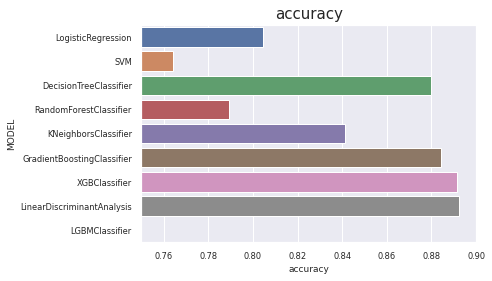

In [113]:
sns.barplot(x = s_df.accuracy, y = s_df.MODEL)
plt.xlim(0.75,0.9)
plt.title('accuracy', size = 15)
plt.show()

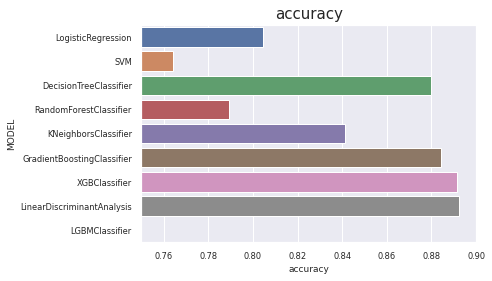

In [114]:
sns.barplot(x = s_df.accuracy, y = s_df.MODEL)
plt.xlim(0.75,0.9)
plt.title('accuracy', size = 15)
plt.show()

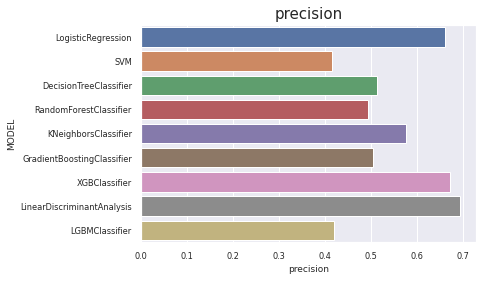

In [115]:
sns.barplot(x = s_df.precision, y = s_df.MODEL)
#plt.xlim(0.75,0.9)
plt.title('precision', size = 15)
plt.show()

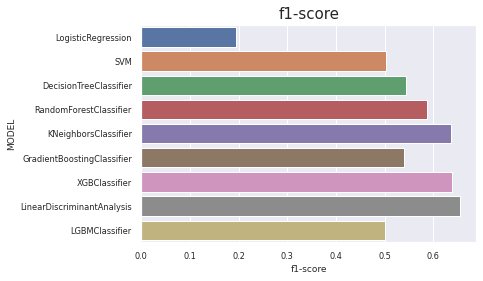

In [116]:
sns.barplot(x = s_df['f1-score'], y = s_df.MODEL)
#plt.xlim(0.75,0.9)
plt.title('f1-score', size = 15)
plt.show()

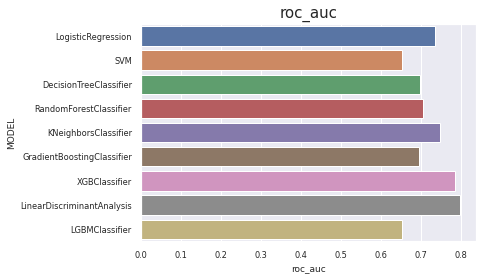

In [117]:
sns.barplot(x = s_df.roc_auc, y = s_df.MODEL)
#plt.xlim(0.75,0.9)
plt.title('roc_auc', size = 15)
plt.show()

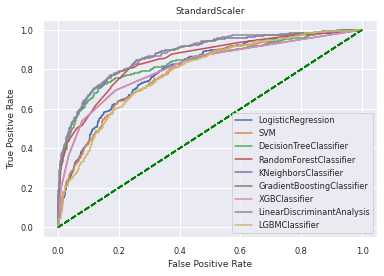

In [118]:
#StandardScaler ROC curve
for i in range(0, 9): 
  plot_roc_curve(fpr[i], tpr[i], M[i])
plt.title('StandardScaler')
plt.show()

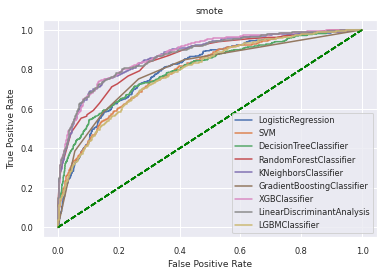

In [119]:
#smote ROC curve
for i in range(10, 19): 
  plot_roc_curve(fpr[i], tpr[i], M[i-10])
plt.title('smote')
plt.show()